# Проект по дисцплине "Машинное обучение" студента группы ИАУП-22 Михайлова Александра Витальевича

## Данные для проекта
Датасет для проекта содержит 10 000 записей с данными пациентов прошедших медицинский осмотр, в том числе:
1) возраст,
2) вес,
3) рост,
4) систолическое давление,
5) диастолическое давление,
6) пол,
7) территория проживания,
8) злоупотребление алкоголем (опрос),
9) иррациональное питание (опрос),
10) курение (опрос),
11) Количество оказанных услуг в поликлинике за год,
12) Количество оказанных услуг скорой помощи за год,
13) Количество оказанных услуг в стационаре за год,
14) Наличие болезни системы кровообращения.

In [207]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import math
from statistics import mean, median, mode, stdev
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LogisticRegression, Ridge
import sklearn.metrics as metrics
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SequentialFeatureSelector
import seaborn as sns

Загрузим и просмотрим данные

In [72]:
df = pd.read_csv('data/health_data.csv')

In [6]:
df.head()

,age,weight,height,s_press,d_press,sex,area,alco,irrat_food,smoke,clinic_cnt,ambulance_cnt,hosp_cnt,has_bsk
0,45,88.0,158.0,130.0,80.0,Женский,Село,0.0,1.0,0.0,57,3,0,1
1,58,72.0,170.0,145.0,95.0,Мужской,Село,0.0,0.0,0.0,176,5,100,1
2,52,81.0,162.0,130.0,80.0,Женский,Село,0.0,0.0,0.0,76,2,9,1
3,66,62.0,160.0,140.0,80.0,Женский,Город,0.0,0.0,0.0,163,14,11,1
4,41,64.0,170.0,110.0,70.0,Женский,Город,0.0,0.0,0.0,79,0,0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            10000 non-null  int64  
 1   weight         9470 non-null   float64
 2   height         9471 non-null   float64
 3   s_press        9368 non-null   float64
 4   d_press        9366 non-null   float64
 5   sex            10000 non-null  object 
 6   area           10000 non-null  object 
 7   alco           7706 non-null   float64
 8   irrat_food     7827 non-null   float64
 9   smoke          7875 non-null   float64
 10  clinic_cnt     10000 non-null  int64  
 11  ambulance_cnt  10000 non-null  int64  
 12  hosp_cnt       10000 non-null  int64  
 13  has_bsk        10000 non-null  int64  
dtypes: float64(7), int64(5), object(2)
memory usage: 1.1+ MB


In [8]:
df.describe()

,age,weight,height,s_press,d_press,alco,irrat_food,smoke,clinic_cnt,ambulance_cnt,hosp_cnt,has_bsk
count,10000.000000,9470.000000,9471.000000,9368.00000,9366.000000,7706.000000,7827.000000,7875.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,57.946800,117.256600,163.967163,130.08070,80.147341,0.066701,0.473106,0.089270,90.062900,4.125700,15.545300,0.574500
std,15.561111,1688.820277,9.977370,177.86144,16.844899,0.249520,0.499308,0.285151,58.096949,10.872236,38.329094,0.494443
min,17.000000,1.000000,1.000000,11.00000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-7.000000,0.000000
25%,48.000000,65.000000,158.000000,120.00000,80.000000,0.000000,0.000000,0.000000,48.000000,0.000000,0.000000,0.000000
50%,60.000000,74.000000,164.000000,125.00000,80.000000,0.000000,0.000000,0.000000,78.000000,2.000000,5.000000,1.000000
75%,69.000000,84.000000,170.000000,130.00000,80.000000,0.000000,1.000000,0.000000,118.000000,5.000000,20.000000,1.000000
max,99.000000,82000.000000,205.000000,13070.00000,960.000000,1.000000,1.000000,1.000000,627.000000,615.000000,1399.000000,1.000000


## Проверка данных вручную
Из описания данных (максимальных и минимальных значений в столбцах) следует, что в наборе пристутсвуют явно некорректные значения. Например максимальное значение  веса составляет 82 000, что предположительно является ошибкой ввода данных - вместо кг данные внесены в граммах.

Попробуем проверить значения вручную

Проверим значения веса более 200

In [9]:
df[df.weight > 200]

,age,weight,height,s_press,d_press,sex,area,alco,irrat_food,smoke,clinic_cnt,ambulance_cnt,hosp_cnt,has_bsk
589,74,70000.0,154.0,140.0,80.0,Женский,Село,NaN,NaN,NaN,64,0,0,1
2012,61,58000.0,161.0,NaN,NaN,Мужской,Село,NaN,NaN,NaN,182,2,0,1
3377,37,47000.0,173.0,NaN,NaN,Женский,Город,NaN,NaN,NaN,275,31,27,0
5574,60,59000.0,161.0,NaN,NaN,Женский,Село,NaN,NaN,NaN,112,0,22,1
5805,30,1700.0,46.0,NaN,NaN,Женский,Город,NaN,NaN,NaN,151,20,11,0
8457,54,82000.0,170.0,NaN,NaN,Женский,Город,NaN,NaN,NaN,90,4,0,1
9429,70,80000.0,159.0,NaN,NaN,Женский,Село,NaN,NaN,NaN,52,0,0,1


Строка со значением веса 1700 и роста 46 явно является некорректной и ее нужно удалить, остальыне значения можно исправить, поделив на 1000

In [73]:
df = df[df.weight != 1700]

In [74]:
df.loc[(df.weight > 200), 'weight'] = df.weight/1000

Проверим значения веса менее 30 кг

In [12]:
df[df.weight < 30]

,age,weight,height,s_press,d_press,sex,area,alco,irrat_food,smoke,clinic_cnt,ambulance_cnt,hosp_cnt,has_bsk
4173,60,1.0,156.0,130.0,80.0,Женский,Город,0.0,1.0,0.0,65,1,0,1
5227,81,6.0,167.0,140.0,90.0,Мужской,Город,0.0,0.0,0.0,53,19,22,1


Значения веса явно некооректные, при этом данные в остальных столбцах не вызывают вопросов. Обнулим значения веса для этих строк и восстановим их по выборке на этапе работы с пропущенными данными

In [75]:
df.loc[(df.weight < 30), 'weight'] = np.NaN

Проверим значения роста менее 100

In [14]:
df[df.height < 100]

,age,weight,height,s_press,d_press,sex,area,alco,irrat_food,smoke,clinic_cnt,ambulance_cnt,hosp_cnt,has_bsk
298,29,110.0,75.0,110.0,75.0,Женский,Село,1.0,1.0,0.0,123,4,16,0
1569,66,171.0,73.0,120.0,80.0,Мужской,Город,0.0,1.0,0.0,64,2,0,1
2665,18,156.0,88.0,120.0,80.0,Женский,Село,0.0,1.0,0.0,71,2,0,0
3324,52,154.0,92.0,130.0,80.0,Женский,Город,0.0,0.0,0.0,222,3,44,1
4651,48,159.0,63.0,130.0,80.0,Женский,Село,0.0,1.0,0.0,48,7,36,0
5616,64,165.0,60.0,135.0,80.0,Мужской,Город,0.0,1.0,1.0,9,6,24,1
5709,61,56.0,68.0,120.0,80.0,Мужской,Город,0.0,1.0,0.0,16,0,0,0
6883,55,120.0,80.0,120.0,80.0,Мужской,Город,NaN,NaN,NaN,38,1,0,0
7130,70,82.0,1.0,130.0,80.0,Женский,Село,0.0,0.0,0.0,185,1,19,1
7276,62,161.0,73.0,122.0,73.0,Женский,Город,NaN,NaN,NaN,86,0,0,0


Значение роста 1 явно некорректное и подлежит удалению, остальные значения судя по всему ошибки ввода, их можно скорректировать прибавив к занчению 100

In [76]:
df = df[df.height != 1]

In [77]:
df.loc[(df.height < 100), 'height'] = df.height + 100

Проверим значения систолического давления меньше 50 или больше 200

In [17]:
df[(df.s_press < 50) | (df.s_press > 200)]

,age,weight,height,s_press,d_press,sex,area,alco,irrat_food,smoke,clinic_cnt,ambulance_cnt,hosp_cnt,has_bsk
631,72,67.0,168.0,17.0,17.0,Женский,Город,0.0,1.0,0.0,85,0,19,0
1008,18,44.0,166.0,11.0,70.0,Мужской,Город,NaN,NaN,NaN,40,1,0,0
1273,62,76.0,163.0,11148.0,80.0,Женский,Город,0.0,0.0,0.0,39,0,9,0
1552,78,78.0,164.0,1230.0,78.0,Женский,Город,0.0,1.0,0.0,43,1,0,1
1759,61,66.0,157.0,13.0,80.0,Женский,Село,0.0,0.0,0.0,88,1,0,1
2143,74,94.0,154.0,1470.0,80.0,Женский,Город,0.0,0.0,0.0,75,3,0,1
2419,60,66.0,172.0,20.0,18.0,Мужской,Город,0.0,0.0,0.0,34,5,11,1
3408,67,62.0,164.0,13070.0,NaN,Женский,Город,0.0,0.0,0.0,60,0,0,0
3655,26,59.0,160.0,1210.0,80.0,Мужской,Город,0.0,0.0,0.0,50,1,2,0
4722,46,100.0,164.0,18.0,18.0,Женский,Село,0.0,0.0,0.0,79,0,7,1


Значения явно некорректные, обнулим их для дальнейшего восстановления

In [78]:
df.loc[((df.s_press < 50) | (df.s_press > 200)), 's_press'] = np.NaN

Проверим значения диастолического давления меньше 50 или больше 200

In [19]:
df[(df.d_press < 50) | (df.d_press > 200)]

,age,weight,height,s_press,d_press,sex,area,alco,irrat_food,smoke,clinic_cnt,ambulance_cnt,hosp_cnt,has_bsk
509,70,75.0,164.0,130.0,740.0,Женский,Город,0.0,0.0,0.0,88,2,22,1
631,72,67.0,168.0,NaN,17.0,Женский,Город,0.0,1.0,0.0,85,0,19,0
2419,60,66.0,172.0,NaN,18.0,Мужской,Город,0.0,0.0,0.0,34,5,11,1
3067,65,87.0,175.0,120.0,710.0,Мужской,Село,0.0,0.0,0.0,201,13,46,1
3336,74,60.0,155.0,120.0,30.0,Женский,Город,0.0,1.0,0.0,42,3,14,1
4722,46,100.0,164.0,NaN,18.0,Женский,Село,0.0,0.0,0.0,79,0,7,1
6099,74,85.0,165.0,150.0,960.0,Женский,Город,0.0,0.0,0.0,210,14,36,1
7059,50,95.0,157.0,120.0,20.0,Женский,Село,0.0,0.0,1.0,62,1,0,0
7301,64,115.0,173.0,120.0,800.0,Женский,Город,0.0,0.0,0.0,23,0,0,1
7727,67,81.0,153.0,NaN,18.0,Женский,Село,0.0,0.0,0.0,84,2,0,1


Значения явно некорректные, обнулим их для дальнейшего восстановления

In [79]:
df.loc[((df.d_press < 50) | (df.d_press > 200)), 'd_press'] = np.NaN

Проверим количество поликлинических услуг более 365

In [21]:
df[df.clinic_cnt > 365]

,age,weight,height,s_press,d_press,sex,area,alco,irrat_food,smoke,clinic_cnt,ambulance_cnt,hosp_cnt,has_bsk
1388,64,70.0,160.0,125.0,75.0,Женский,Город,NaN,NaN,NaN,454,3,34,1
2138,65,52.0,162.0,120.0,80.0,Женский,Город,0.0,0.0,0.0,627,74,9,1
2263,74,62.0,158.0,130.0,80.0,Женский,Город,0.0,1.0,0.0,424,18,32,1
2290,51,85.0,156.0,140.0,80.0,Женский,Село,0.0,0.0,0.0,375,17,74,1
3306,59,65.0,164.0,130.0,85.0,Женский,Село,0.0,0.0,0.0,370,6,15,1
3513,74,NaN,NaN,130.0,80.0,Женский,Город,0.0,1.0,0.0,367,24,1399,1
5135,80,55.0,155.0,110.0,70.0,Женский,Город,0.0,1.0,0.0,413,11,94,1
5379,74,72.0,159.0,130.0,90.0,Женский,Город,NaN,NaN,NaN,382,12,24,1
5427,82,75.0,168.0,125.0,70.0,Мужской,Город,0.0,0.0,0.0,410,6,29,1
6009,86,49.0,141.0,150.0,80.0,Женский,Город,NaN,NaN,0.0,400,53,117,1


Анализ выведенных записей показывает, что практически все пациенты с высоким количеством поликлинических услуг являются пожилыми людьми с болезнями системы кровообращения. Установим верхнюю границу в 300 услуг

In [80]:
df.loc[(df.clinic_cnt > 300), 'clinic_cnt'] = 300

Проверим количество услуг скорой помощи более 100

In [24]:
df[df.ambulance_cnt > 100]

,age,weight,height,s_press,d_press,sex,area,alco,irrat_food,smoke,clinic_cnt,ambulance_cnt,hosp_cnt,has_bsk
777,64,90.0,155.0,130.0,80.0,Женский,Город,0.0,1.0,0.0,78,121,49,1
2678,85,57.0,160.0,160.0,80.0,Женский,Город,0.0,0.0,0.0,300,615,20,1
4719,89,70.0,150.0,140.0,80.0,Женский,Город,0.0,0.0,0.0,255,168,83,1
6091,80,69.0,155.0,125.0,80.0,Женский,Город,NaN,NaN,NaN,298,137,64,1
6770,74,90.0,163.0,130.0,80.0,Женский,Город,0.0,0.0,0.0,300,141,115,1
7292,66,96.0,175.0,120.0,80.0,Мужской,Город,NaN,NaN,NaN,170,461,140,1
7890,83,55.0,160.0,120.0,80.0,Женский,Село,0.0,1.0,0.0,300,267,79,1
8446,82,75.0,164.0,150.0,90.0,Женский,Город,NaN,NaN,NaN,236,131,131,1


Установим верхнюю границу в 100 услуг

In [81]:
df.loc[(df.ambulance_cnt > 100), 'ambulance_cnt'] = 100

Проверим отрицательное значение стационарных услуг

In [27]:
df[df.hosp_cnt < 0]

,age,weight,height,s_press,d_press,sex,area,alco,irrat_food,smoke,clinic_cnt,ambulance_cnt,hosp_cnt,has_bsk
6717,74,88.0,162.0,115.0,70.0,Женский,Город,0.0,0.0,0.0,63,31,-7,1


Заменим отрицательные значения на 0

In [82]:
df.loc[(df.hosp_cnt < 0), 'hosp_cnt'] = 0

Проверим количество стационарных услуг более 200

In [29]:
df[df.hosp_cnt > 200]

,age,weight,height,s_press,d_press,sex,area,alco,irrat_food,smoke,clinic_cnt,ambulance_cnt,hosp_cnt,has_bsk
494,70,67.0,175.0,120.0,70.0,Мужской,Город,0.0,0.0,0.0,204,15,413,1
719,91,80.0,156.0,150.0,90.0,Женский,Город,NaN,NaN,NaN,165,15,208,1
981,62,65.0,169.0,110.0,70.0,Мужской,Село,0.0,0.0,0.0,118,1,244,0
1235,66,80.0,170.0,120.0,80.0,Мужской,Город,0.0,1.0,0.0,145,14,341,0
1348,41,56.0,166.0,130.0,80.0,Мужской,Город,0.0,0.0,0.0,221,16,308,1
1922,59,72.0,162.0,130.0,80.0,Женский,Город,0.0,0.0,0.0,300,8,256,1
2003,72,90.0,167.0,130.0,80.0,Мужской,Город,NaN,NaN,NaN,113,4,469,1
2257,72,75.0,165.0,145.0,95.0,Женский,Город,0.0,1.0,0.0,206,17,1158,1
2876,51,56.0,172.0,110.0,70.0,Мужской,Село,0.0,0.0,0.0,46,0,461,1
3451,69,62.0,153.0,120.0,80.0,Женский,Город,0.0,0.0,0.0,246,23,527,1


Установим верхнюю границу в 200 услуг

In [83]:
df.loc[(df.hosp_cnt > 200), 'hosp_cnt'] = 200

Проверим результат ручной обработки

In [84]:
df.describe()

,age,weight,height,s_press,d_press,alco,irrat_food,smoke,clinic_cnt,ambulance_cnt,hosp_cnt,has_bsk
count,9998.00000,9466.000000,9469.000000,9355.000000,9355.000000,7705.000000,7826.000000,7874.000000,9998.000000,9998.000000,9998.000000,9998.000000
mean,57.94839,75.325058,164.144683,127.078675,79.876964,0.066710,0.473166,0.089281,89.634527,4.000300,14.731746,0.574515
std,15.55969,15.562660,9.148575,12.614878,7.387423,0.249535,0.499311,0.285167,56.131457,7.149828,24.685199,0.494441
min,17.00000,32.000000,102.000000,72.000000,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,65.000000,158.000000,120.000000,80.000000,0.000000,0.000000,0.000000,48.000000,0.000000,0.000000,0.000000
50%,60.00000,74.000000,164.000000,125.000000,80.000000,0.000000,0.000000,0.000000,78.000000,2.000000,5.000000,1.000000
75%,69.00000,84.000000,170.000000,130.000000,80.000000,0.000000,1.000000,0.000000,118.000000,5.000000,20.000000,1.000000
max,99.00000,176.000000,205.000000,200.000000,177.000000,1.000000,1.000000,1.000000,300.000000,100.000000,200.000000,1.000000


## Удаление/восстановление пропусков
Выведем количество строк, в которых не заполнены данные рост/вес и давление

In [85]:
df[(df.weight.isnull()) & (df.height.isnull()) & (df.s_press.isnull()) & (df.d_press.isnull())].index.size

493

Удалим данные строки как неинформативные

In [86]:
df = df[(df.weight.notnull()) & (df.height.notnull()) & (df.s_press.notnull()) & (df.d_press.notnull())]

Выведем процент пропущенных значений по каждому столбцу в наборе данных

In [87]:
[f'{column}: {100*df[column].isnull().sum()/df.index.size}%' for column in df.columns]

['age: 0.0%',
 'weight: 0.0%',
 'height: 0.0%',
 's_press: 0.0%',
 'd_press: 0.0%',
 'sex: 0.0%',
 'area: 0.0%',
 'alco: 17.90547798066595%',
 'irrat_food: 16.595059076262086%',
 'smoke: 16.090225563909776%',
 'clinic_cnt: 0.0%',
 'ambulance_cnt: 0.0%',
 'hosp_cnt: 0.0%',
 'has_bsk: 0.0%']

Проверим распределение значений в столбцах с пропусками

In [88]:
restore_columns = ['alco', 'irrat_food', 'smoke']

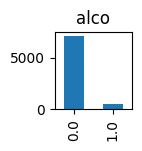

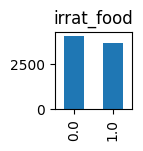

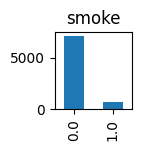

In [89]:
for column in restore_columns:
    df[column].value_counts().plot(kind='bar', title=column, figsize=(1, 1))
    plt.show()

Заполним пропущенные значения с помощью метода N ближайших соседей, с учетом столбцов возраст, рост, вес, давление

In [90]:
imputer = KNNImputer(missing_values=np.nan, n_neighbors=5)
columns = ['age', 'weight', 'height', 's_press', 'd_press', 'alco', 'irrat_food', 'smoke']
imputer.fit(df[columns])

KNNImputer()

In [91]:
df[columns] = imputer.transform(df[columns])

В результате работы алгоритма рассчитывается усредненное значение, округлим до целого, чтобы получить бинарные значения 0 или 1

In [92]:
for column in restore_columns:
    df[column] = np.round(df[column])

In [93]:
df.describe()

,age,weight,height,s_press,d_press,alco,irrat_food,smoke,clinic_cnt,ambulance_cnt,hosp_cnt,has_bsk
count,9310.000000,9310.000000,9310.000000,9310.000000,9310.000000,9310.000000,9310.000000,9310.000000,9310.000000,9310.000000,9310.000000,9310.000000
mean,58.256498,75.294952,164.137809,127.077981,79.859936,0.055961,0.473255,0.077336,89.830505,3.974221,14.681847,0.581096
std,15.519359,15.534720,9.155431,12.634161,7.391681,0.229859,0.499311,0.267138,56.210986,7.220986,24.733695,0.493406
min,17.000000,32.000000,102.000000,72.000000,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,65.000000,158.000000,120.000000,80.000000,0.000000,0.000000,0.000000,48.000000,0.000000,0.000000,0.000000
50%,60.000000,74.000000,164.000000,125.000000,80.000000,0.000000,0.000000,0.000000,78.000000,2.000000,5.000000,1.000000
75%,69.000000,84.000000,170.000000,130.000000,80.000000,0.000000,1.000000,0.000000,119.000000,5.000000,20.000000,1.000000
max,99.000000,176.000000,205.000000,200.000000,177.000000,1.000000,1.000000,1.000000,300.000000,100.000000,200.000000,1.000000


## Очистка данных от выбросов
Проверим данные в числовых столбцах на наличие выбросов

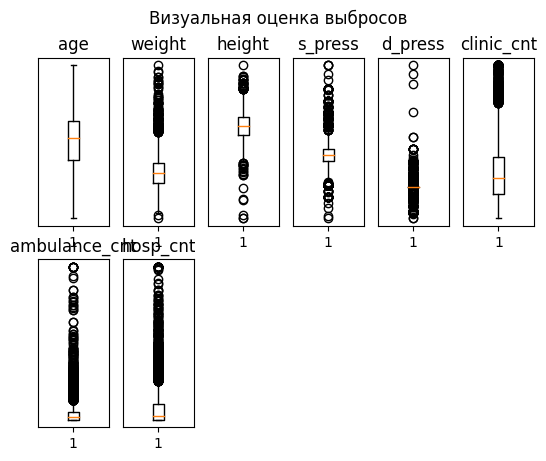

In [97]:
num_columns = ['age', 'weight', 'height', 's_press', 'd_press', 'clinic_cnt', 'ambulance_cnt', 'hosp_cnt']
for i, column in enumerate(num_columns):
    plt.subplot(2, 6, 1 + i)
    plt.title(column)
    plt.xticks([])
    plt.yticks([])
    plt.boxplot(df[column])
plt.suptitle("Визуальная оценка выбросов")
plt.show()

Оценим количество строк к удалению если оценивать выбросы с помощью интерквартильного размаха

In [98]:
outliers = set()
for column in num_columns:
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    outliers = outliers.union(set(df[(df[column] < q1 - 1.5*iqr ) | (df[column] > q1 + 1.5*iqr)].index))
len(outliers)

6797

При удалении выбросов с использованием интерквартильного размаха удалению подлежит значительная часть данных. Построим гистограммы для указанных столбцов

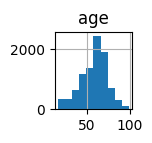

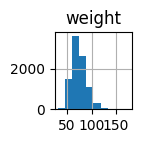

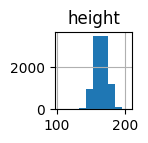

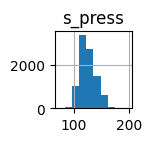

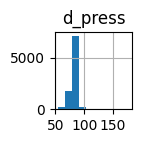

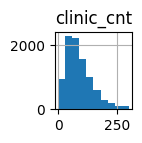

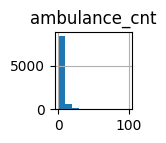

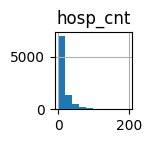

In [99]:
for column in num_columns:
    df.hist(column=column, figsize=(1, 1))
    plt.show()

Предположив, что данные в указанных столбцах распределены нормально, можно использовать критерий Шовене для выявления выбросов.
Согласно критерию Шовене, значение $p_i$ является выбросом при выполнении неравенства

$erfc(\frac{|p_i - \overline{p}|}{S_p}) < \frac{1}{2n}$

Создадим функцию для проверки значения на выброс с использованием функций math.erfc, при этом расчеты среднего по столбцу и стандартного отклонения вынесем из функции, чтобы вычислять их не для каждого значения, а один раз для всего столбца.

In [100]:
def chauvenet_filter(value, col_mean, col_stdev, to_cmp):
    return math.erfc(abs(value - col_mean) / col_stdev) < to_cmp

Оценим количество строк к удалению при использовании критерия Шовене

In [101]:
for column in num_columns:
    col_mean = df[column].mean()
    col_stdev = stdev(df[column])
    to_cmp = 1 / (2 * len(df[column].index))
    outliers = df[(df[column].apply(lambda value: chauvenet_filter(value, col_mean, col_stdev, to_cmp)))]
    print(f'{column} к удалению {len(outliers.index)} строк(и):')

age к удалению 0 строк(и):
weight к удалению 115 строк(и):
height к удалению 33 строк(и):
s_press к удалению 103 строк(и):
d_press к удалению 21 строк(и):
clinic_cnt к удалению 164 строк(и):
ambulance_cnt к удалению 177 строк(и):
hosp_cnt к удалению 203 строк(и):


Просмотрим визуально распределение данных, подлежащих удалению

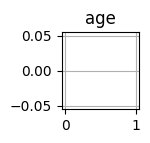

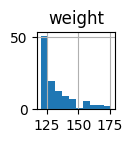

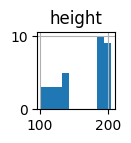

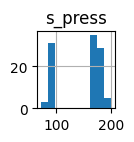

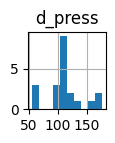

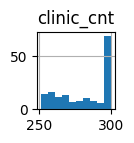

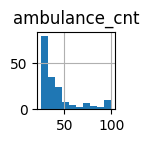

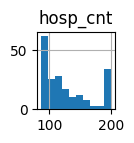

In [102]:
for column in num_columns:
    col_mean = df[column].mean()
    col_stdev = stdev(df[column])
    to_cmp = 1 / (2 * len(df[column].index))
    outliers = df[(df[column].apply(lambda value: chauvenet_filter(value, col_mean, col_stdev, to_cmp)))]
    outliers.hist(column=column, figsize=(1, 1))

Удалим выбросы с использованием критерия Шовене

In [103]:
for column in num_columns:
    col_mean = mean(df[column])
    col_stdev = stdev(df[column])
    to_cmp = 1 / (2 * len(df[column].index))
    outliers = df[(df[column].apply(lambda value: chauvenet_filter(value, col_mean, col_stdev, to_cmp)))]
    df.drop(labels=outliers.index, axis=0, inplace=True)
print(f'В датафрейме после удаления выбросов {len(df.index)} строк')

В датафрейме после удаления выбросов 8406 строк


## Нормализация числовых колонок и замена номинальных признаков
Выполним нормализацию значений числовых столбцов методом стандартизации (приведение к 𝑋̅ = 0, 𝑆 = 1). Перед нормализацией сохраним данные исходного датасета.

In [104]:
df_source = df.copy()

In [105]:
scaler = StandardScaler()
num_columns = ['age', 'weight', 'height', 's_press', 'd_press']
for column in num_columns:
    df[column] = scaler.fit_transform(df[[column]])

Заменим номинальные признаки sex и area на числовые

In [106]:
encoder = LabelEncoder()
encoder.fit(df['sex'])
df['sex'] = encoder.transform(df['sex'])
encoder.fit(df['area'])
df['area'] = encoder.transform(df['area'])

Приведем столбцы alco, irrat_food, smoke к целочисленному типу

In [107]:
for column in ['alco', 'irrat_food', 'smoke']:
    df = df.astype({column: np.int64})

## Регрессия
В качестве целевого признака Y выберем clinic_cnt - количество услуг в поликлинике в течении года.
В качестве факторных признаков выберем:
- возраст,
- вес,
- рост,
- систолическое давление,
- диастолическое давление,
- пол,
- территория проживания,
- злоупотребление алкоголем (опрос),
- иррациональное питание (опрос),
- курение (опрос).

Проверим корреляцию между признаками

In [108]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,age,weight,height,s_press,d_press,sex,area,alco,irrat_food,smoke,clinic_cnt,ambulance_cnt,hosp_cnt,has_bsk
age,1.000000,0.041814,-0.313588,0.421567,0.262416,-0.128440,-0.016995,-0.133295,0.009628,-0.136384,0.114745,0.171003,0.273306,0.516637
weight,0.041814,1.000000,0.358789,0.205664,0.179760,0.205389,0.007710,0.003798,0.084434,-0.003342,-0.000322,-0.008408,0.076905,0.147845
height,-0.313588,0.358789,1.000000,-0.114598,-0.043478,0.641668,-0.065687,0.075620,0.019734,0.174846,-0.173365,-0.030380,-0.037058,-0.178996
s_press,0.421567,0.205664,-0.114598,1.000000,0.594557,-0.004600,0.012628,-0.039464,0.083614,-0.055797,0.063198,0.108946,0.152848,0.413705
d_press,0.262416,0.179760,-0.043478,0.594557,1.000000,0.020266,0.015177,-0.011894,0.054635,-0.026253,0.032863,0.063546,0.094208,0.261291
sex,-0.128440,0.205389,0.641668,-0.004600,0.020266,1.000000,0.042513,0.059245,0.013227,0.244694,-0.220326,-0.023130,0.021357,-0.083266
area,-0.016995,0.007710,-0.065687,0.012628,0.015177,0.042513,1.000000,-0.008672,0.001845,0.092968,-0.007216,-0.139856,-0.023650,-0.015811
alco,-0.133295,0.003798,0.075620,-0.039464,-0.011894,0.059245,-0.008672,1.000000,0.058856,0.163227,-0.049011,-0.041825,-0.055626,-0.084504
irrat_food,0.009628,0.084434,0.019734,0.083614,0.054635,0.013227,0.001845,0.058856,1.000000,0.049747,0.000380,0.016176,0.013383,0.037074
smoke,-0.136384,-0.003342,0.174846,-0.055797,-0.026253,0.244694,0.092968,0.163227,0.049747,1.000000,-0.110821,-0.042530,-0.051614,-0.116074


Судя по данным матрицы имеется линейная зависимость меджу весом и ростом, а также показателями давления. Заменим указанные столбцы на отношение давлений press_ratio и индекс массы тела bmi.

In [109]:
df['press_ratio'] = df.s_press/df.d_press

In [110]:
df['bmi'] = df.weight / (df.height/100)**2

In [111]:
df = df[[column for column in df.columns if column not in(['s_press', 'd_press', 'weight', 'height'])]]

In [112]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,age,sex,area,alco,irrat_food,smoke,clinic_cnt,ambulance_cnt,hosp_cnt,has_bsk,press_ratio,bmi
age,1.000000,-0.128440,-0.016995,-0.133295,0.009628,-0.136384,0.114745,0.171003,0.273306,0.516637,0.262285,0.043639
sex,-0.128440,1.000000,0.042513,0.059245,0.013227,0.244694,-0.220326,-0.023130,0.021357,-0.083266,-0.036364,-0.010054
area,-0.016995,0.042513,1.000000,-0.008672,0.001845,0.092968,-0.007216,-0.139856,-0.023650,-0.015811,0.010851,0.020593
alco,-0.133295,0.059245,-0.008672,1.000000,0.058856,0.163227,-0.049011,-0.041825,-0.055626,-0.084504,-0.041604,0.010066
irrat_food,0.009628,0.013227,0.001845,0.058856,1.000000,0.049747,0.000380,0.016176,0.013383,0.037074,0.048113,0.018681
smoke,-0.136384,0.244694,0.092968,0.163227,0.049747,1.000000,-0.110821,-0.042530,-0.051614,-0.116074,-0.046541,-0.010762
clinic_cnt,0.114745,-0.220326,-0.007216,-0.049011,0.000380,-0.110821,1.000000,0.227609,0.344479,0.226824,0.071413,0.024918
ambulance_cnt,0.171003,-0.023130,-0.139856,-0.041825,0.016176,-0.042530,0.227609,1.000000,0.321173,0.217404,0.066689,0.008796
hosp_cnt,0.273306,0.021357,-0.023650,-0.055626,0.013383,-0.051614,0.344479,0.321173,1.000000,0.298509,0.102300,0.033277
has_bsk,0.516637,-0.083266,-0.015811,-0.084504,0.037074,-0.116074,0.226824,0.217404,0.298509,1.000000,0.285471,0.058594


Разобьем выборку на обучающую и тестовую в отношении 9 к 1

In [144]:
k = 10
x_columns = ['age', 'bmi', 'press_ratio', 'sex', 'has_bsk']
y_column = 'clinic_cnt'
x_train, x_test, y_train, y_test = train_test_split(df[x_columns], df[y_column], test_size=1/k)

Построим модель множественной линейной регрессии на обучающей выборке. выведем полученные коэффициенты и значение свободного члена.

In [145]:
model_regression = LinearRegression().fit(X=x_train, y=y_train)
print(f"Коэффициенты модели: {model_regression.coef_}, свободный член: {model_regression.intercept_}")

Коэффициенты модели: [-1.21414089e+00  4.36927340e-08  8.10553377e-02 -2.08495925e+01
  2.19227000e+01], свободный член: 79.60314945028465


Получим с помощью модели предсказанное целевое значение на тестовой выборке и оценим качество модели по метрикам MAE и MAPE.

Метрика MAE иллюстрирует среднюю абсолютную ошибку. Метрика MAPE иллюстрирует среднюю абсолютную ошибку в процентах.

In [146]:
y_pred = model_regression.predict(x_test)
print(f"MAPE = {metrics.mean_absolute_percentage_error(y_test, y_pred) * 100}%")

MAPE = 71.6851464248568%


In [158]:
y_pred = model_regression.predict(x_test)
print(f"MAE = {metrics.mean_absolute_error(y_test, y_pred)}")

MAE = 36.063677616049716


### Вывод:
Модель линейной регрессии не может предсказать количество услуг, оказанных пациенту в поликлинике за год, по выбранным показателям.

## Классификация
В качестве целевого признака Y выберем has_bsk - Наличие болезни системы кровообращения.
В качестве факторных признаков выберем:
- возраст,
- индекс массы тела,
- отношение давлений,
- пол,
- территория проживания,
- злоупотребление алкоголем (опрос),
- иррациональное питание (опрос),
- курение (опрос).

Разобьем выборку на обучающую и тестовую в отношении 2 к 1

In [241]:
x_columns = ['age', 'bmi', 'press_ratio', 'sex', 'area', 'alco', 'irrat_food', 'smoke']
y_column = 'has_bsk'
x_train, x_test, y_train, y_test = train_test_split(df[x_columns], df[y_column],
                                                    test_size=1/3, stratify=df[y_column])

In [242]:
model = LogisticRegression().fit(X=x_train, y=y_train)

Получим с помощью модели предсказанное целевое значение на тестовой выборке и оценим качество модели по метрике F-measure.

Метрика F-measure представляет собой гармоническое среднее между точностью и полнотой. Она принимает значения от 0 до 1 и стремится к нулю, если точность или полнота стремится к нулю.

In [243]:
y_pred = model.predict(x_test)
print("F-measure:", metrics.f1_score(y_test, y_pred))

F-measure: 0.5607802159526297


Значение F-меры для обученной модели составило 0,56, что свидетельствует о низком качестве модели. Выведем метрики Precision и Recall, а также коэффициенты модели.

Precision (точность) - отношение TP к TP + FP. Это доля объектов, названными классификатором положительными и при этом действительно являющимися положительными

Recall (Полнота) - отношение TP к TP + FN. Это то, какую долю объектов положительного класса из всех объектов положительного класса нашёл алгоритм. 

In [244]:
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

Precision: 0.6159143075745983
Recall: 0.5147058823529411


In [245]:
print(f"Коэффициенты модели: {model.coef_}, свободный член: {model.intercept_}")

Коэффициенты модели: [[ 3.83265651e-14  1.31607312e-08  1.56802519e-13 -6.42900485e-17
   1.58481721e-15 -9.18878064e-16  5.61682975e-15 -1.66276958e-15]], свободный член: [8.85659383e-15]


Для обучения модели использовались 8 признаков, попробем отобрать из них пять наиболее пригодных для построения моделей

In [247]:
x_columns = ['age', 'bmi', 'press_ratio', 'sex', 'area', 'alco', 'irrat_food', 'smoke']
y_column = 'has_bsk'
feature_ratio = 5./len(x_columns)
selector = SequentialFeatureSelector(
    estimator=LinearRegression(),
    scoring=None,
    n_features_to_select=feature_ratio,
    direction="forward").fit(X=df[x_columns], y=df[y_column])
selected_features = selector.get_feature_names_out()
print(f"Выбранные признаки: {', '.join(selected_features)}")

Выбранные признаки: age, bmi, press_ratio, irrat_food, smoke


Подготовим данные для модели с учетом выбранных признаков

In [250]:
x_columns = selected_features
y_column = 'has_bsk'
x_train, x_test, y_train, y_test = train_test_split(df[x_columns], df[y_column], test_size=1/3, stratify=df[y_column])

Попробуем обучить модель Случайный лес 

In [264]:
random_forest = RandomForestClassifier(n_estimators=100).fit(X=x_train, y=y_train)

Выведем метрики для обученной модели

In [265]:
y_pred = random_forest.predict(x_test)
print("F-measure:", metrics.f1_score(y_test, y_pred))

F-measure: 0.7642124883504193


In [266]:
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

Precision: 0.743202416918429
Recall: 0.7864450127877238


Качество обученной модели среднее, о чем свидетельствует значение F-меры 0,76. Значение точности 0,74 означает, что из 100 пациентов, для которых алгоритм предсказал наличие заболевания, только 74 имеют это заболевание в реальности. Значение полноты 0,79 означает, что из 100 реально больных пациентов алгоритм выявил только 79.

Выводем важность признаков, рассчитанную алгоритмом

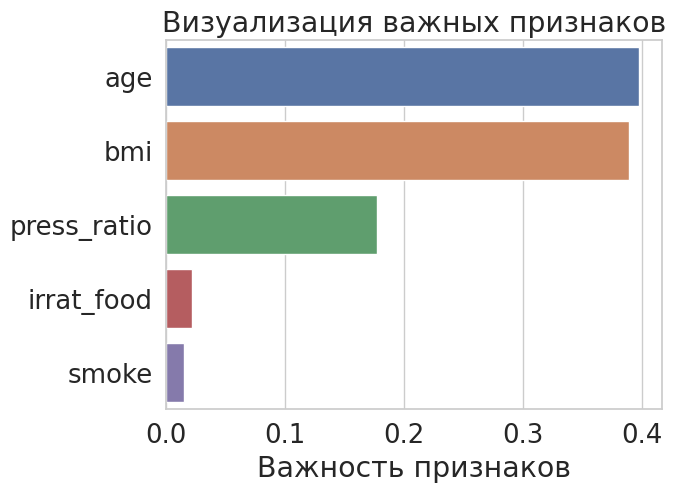

In [263]:
feature_imp = pd.Series(random_forest.feature_importances_,index=x_columns).sort_values(ascending=False)
sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Важность признаков')
plt.title('Визуализация важных признаков')
plt.show()

График иллюсстирирует, что для решение алгортма основано в большей части на трехъ признаках - возрасте, индексе массы тела и отношении давлений